In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('diminos_data.csv')
data.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
data.shape

(15000, 3)

In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [7]:
data['order_placed_at']=pd.to_datetime(data['order_placed_at'])
data['order_delivered_at']=pd.to_datetime(data['order_delivered_at'])

In [8]:
data['delivery_time']=data['order_delivered_at']-data['order_placed_at']

In [9]:
data['delivery_time_mins']=data['delivery_time'].dt.total_seconds()/60

In [10]:
data.head()

,order_id,order_placed_at,order_delivered_at,delivery_time,delivery_time_mins
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056,16.176984


In [11]:
p95=data['delivery_time_mins'].quantile(0.95)
print(p95)

27.261043996666658


In [12]:
filtered_data=data[data['delivery_time_mins']<=60]

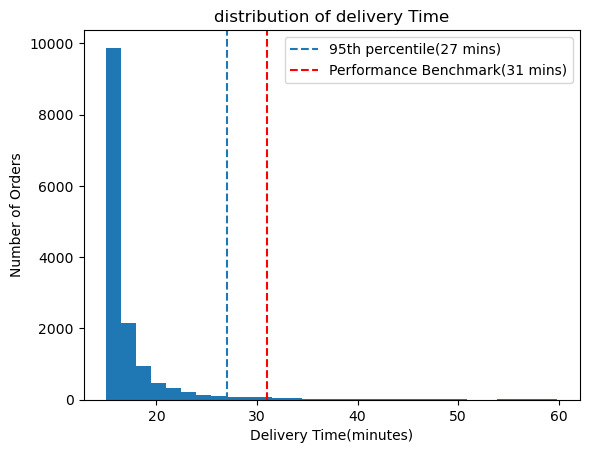

In [13]:
plt.figure()
plt.hist(filtered_data['delivery_time_mins'],bins=30)
plt.axvline(27,linestyle='--',label='95th percentile(27 mins)')
plt.axvline(31,linestyle='--',label='Performance Benchmark(31 mins)',color='red')
plt.xlabel('Delivery Time(minutes)')
plt.ylabel('Number of Orders')
plt.title('distribution of delivery Time')
plt.legend()
plt.show()

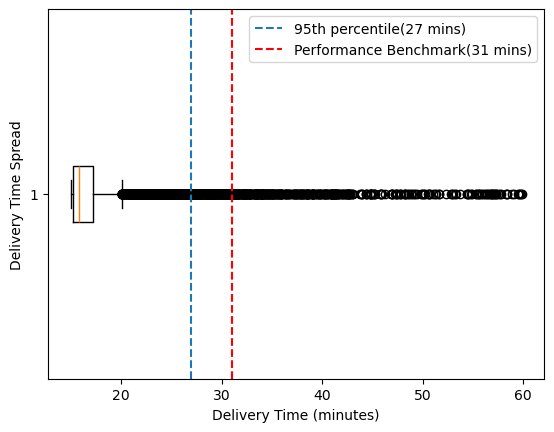

In [14]:
plt.figure()
plt.boxplot(filtered_data['delivery_time_mins'],vert=False)
plt.axvline(27,linestyle='--',label='95th percentile(27 mins)')
plt.axvline(31,linestyle='--',label='Performance Benchmark(31 mins)',color='red')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Delivery Time Spread')
plt.legend()
plt.show()

# Insights
- 95% of orders are delivered within 27 minutes.Therefor, Kanav's store meets Dimino's delivery performance requirement. 
- Performance well within benchmark limits
- The stores delivery system is efficient and reliable for the majority of customers
- Occasional late deliveries exist but are not systemic
- The store is currently meeting delivery target,but regular monitoring and small improvements can help reduce late deliveries and improve customer satisfaction